# ...........DATASET 1 : BANKING DATASET...............

In [1]:
# Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## KNN Library
from sklearn.neighbors import KNeighborsClassifier
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
### Keras and Tensor flow libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
df = pd.read_csv("C:\\ITM SPRING 2020\\New folder\\BANK_FULL.csv")


d1=pd.get_dummies(df['default'],drop_first=False).rename(columns=lambda x:'default_'+str(x))
d2=pd.get_dummies(df['housing'],drop_first=False).rename(columns=lambda x:'housing_'+str(x))
d3=pd.get_dummies(df['loan'],drop_first=False).rename(columns=lambda x:'loan_'+str(x))
d4=pd.get_dummies(df['marital'],drop_first=False).rename(columns=lambda x:'marital_' + str(x))
d5=pd.get_dummies(df['contact'],drop_first=False).rename(columns=lambda x:'contact_' + str(x))
d6=pd.get_dummies(df['poutcome'],drop_first=False).rename(columns=lambda x:'poutcome_' + str(x))

df.drop(columns =['marital','contact','poutcome','default','housing','loan'],inplace=True)
df=pd.concat([df,d1,d2,d3,d4,d5,d6], axis=1)


job_map       = {'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':5,
                 'retired':6, 'admin.':7 ,'services':8, 'self-employed':9, 'unemployed':10, 'housemaid':11,
                 'student':12}
education_map = {'tertiary':1 ,'secondary':2,'unknown':4, 'primary':3}
month_map     = {'may':5, 'jun':6, 'jul':7 ,'aug':8 ,'oct':10 ,'nov':11, 'dec':12, 'jan':1, 'feb':2 ,'mar':3, 'apr':4 ,'sep':9}
y_map         = {"no":0,"yes":1}

df["job_"]       = df.job.map(job_map)
df["education_"] = df.education.map(education_map)
df["month_"]     = df.month.map(month_map)
df["target"]     = df.y.map(y_map)
df.drop(columns  = ["job","education","month","y"],inplace=True)
data = df.copy()

In [46]:
X_ = data.drop(columns = ["target"])

In [3]:
data.drop(columns =['poutcome_failure','poutcome_other','poutcome_unknown','loan_no','default_no','pdays','previous'],inplace=True)
#Splitting the Dataset 
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 20)
## data preperation
y_train=train_data['target']
y_test=test_data['target']
x_train=train_data[['age', 'balance', 'day', 'duration', 'campaign', 'default_yes',
       'housing_no', 'housing_yes', 'loan_yes', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_success', 'job_',
       'education_', 'month_']]
x_test=test_data[['age', 'balance', 'day', 'duration', 'campaign', 'default_yes',
       'housing_no', 'housing_yes', 'loan_yes', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_success', 'job_',
       'education_', 'month_']]
#scaling
scaling = preprocessing.StandardScaler().fit(x_train)
X_train = scaling.transform(x_train)
scaling = preprocessing.StandardScaler().fit(x_test)
X_test = scaling.transform(x_test)


print("X_train shape  : ",X_train.shape)
print("Y_train shape  : ",y_train.shape)
print("X_test shape   : ",X_test.shape)
print("y_test shape   : ",y_test.shape)


X_train shape  :  (31647, 19)
Y_train shape  :  (31647,)
X_test shape   :  (13564, 19)
y_test shape   :  (13564,)


In [103]:
X = X_train
y = y_train

# ...........................................TASK 1.....................................

# KMEANS

Optimal value of K using Elbow method and silhouette_score

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sum_of_squared_distances=[]
silhouette_score_avg =[]
K=range(2,25)
for k in K:
    Kmeans=KMeans(n_clusters=k)
    Kmeans.fit(X)
    sum_of_squared_distances.append(Kmeans.inertia_)
    cluster_labels = Kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_score_avg.append(silhouette_avg)
    print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.13409095824585376
For n_clusters = 3 The average silhouette_score is : 0.13670340267437509
For n_clusters = 4 The average silhouette_score is : 0.14785560126123967
For n_clusters = 5 The average silhouette_score is : 0.1590552265095714
For n_clusters = 6 The average silhouette_score is : 0.15344803516998062
For n_clusters = 7 The average silhouette_score is : 0.16691860111804768
For n_clusters = 8 The average silhouette_score is : 0.1782822095176072
For n_clusters = 9 The average silhouette_score is : 0.1775835785067674
For n_clusters = 10 The average silhouette_score is : 0.1793941785219644
For n_clusters = 11 The average silhouette_score is : 0.18789221714768234
For n_clusters = 12 The average silhouette_score is : 0.18532915162989624
For n_clusters = 13 The average silhouette_score is : 0.18604857870958982
For n_clusters = 14 The average silhouette_score is : 0.1929123938251489
For n_clusters = 15 The average silhouette_score is

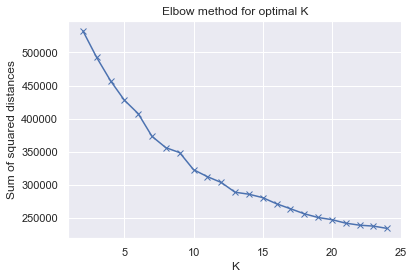

In [69]:
#K=2
sns.set()
plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

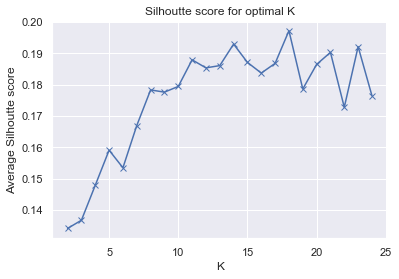

In [70]:
sns.set()
plt.plot(K,silhouette_score_avg,'bx-')
plt.xlabel('K')
plt.ylabel('Average Silhoutte score')
plt.title('Silhoutte score for optimal K')
plt.show()

# EXPECTATION MAXIMIZATION

No Of Components using AIC and BIC


Bayesian information criterion (BIC)
The Bayesian information criterion (BIC) is used my mclust with is a test used to assess the fit of a model, The Bayesian information criterion (BIC) or Schwarz criterion (also SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it It is similar to the Akaike information criterion (AIC) which is founded on information theory: it offers a relative estimate of the information lost when a given model is used to represent the process that generates the data. In doing so, it deals with the trade-off between the goodness of fit of the model and the complexity of the model.

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC try to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC. The BIC was developed by Gideon E. Schwarz and published in a 1978 paper, where he gave a Bayesian argument for adopting it.

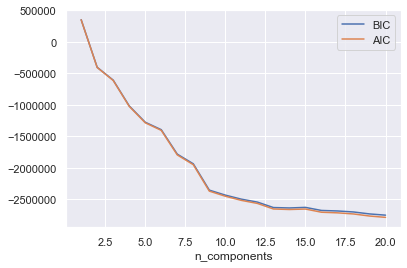

In [37]:
#EM
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

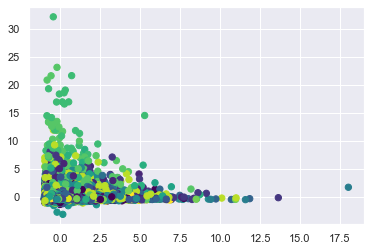

In [38]:
gmm = GaussianMixture(n_components=20).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 3], X[:, 1], c=labels, s=40, cmap='viridis');

These conditions constrain the index so defined to be symmetric and non-negative. 
Due to the way it is defined, as a function of the ratio of the within cluster scatter, 
to the between cluster separation, a lower value will mean that the clustering is better. 
It happens to be the average similarity between each cluster and its most similar one, 
averaged over all the clusters, where the similarity is defined as Si above. 
This affirms the idea that no cluster has to be similar to another, 
and hence the best clustering scheme essentially minimizes the Davies–Bouldin index. 
This index thus defined is an average over all the i clusters, 
and hence a good measure of deciding how many clusters actually exists 
in the data is to plot it against the number of clusters it is calculated over. 
The number i for which this value is the lowest is a good measure of the 
number of clusters the data could be ideally classified into.

In [40]:
from scipy.spatial.distance import pdist, euclidean
def DaviesBouldin(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    db = []

    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                db.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))

    return(np.max(db) / n_cluster)

In [41]:
DaviesBouldin(X,labels)

0.22303596271881343

# ...........................................TASK 2.....................................

Dimensionality Reduction Algorithms:
    1. Feature Selection using ExtraTreesClassifier
    2. Principal Component Analysis(PCA)
    3. Independent Component Analysis (ICA)
    4. Randomized Projections (RP)

# Feature Selection using ExtraTreesClassifier

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning 
technique which aggregates the results of multiple de-correlated decision trees collected in 
a “forest” to output it’s classification result. In concept, it is very similar to a 
Random Forest Classifier and only differs from it in the manner of construction of the 
decision trees in the forest.

Each Decision Tree in the Extra Trees Forest is constructed from the original training 
sample. Then, at each test node, Each tree is provided with a random sample of k features 
from the feature-set from which each decision tree must select the best feature to split 
the data based on some mathematical criteria (typically the Gini Index). 
This random sample of features leads to the creation of multiple de-correlated decision trees.

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
#To suppres exponenetial form of decimal values
np.set_printoptions(suppress=True)
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#Selecting top 5 features 
arr=np.sort(model.feature_importances_,axis=None)
feature_index_arr=model.feature_importances_.argsort()[-5:][::-1]
for i in feature_index_arr:
    print(df.columns[i])

[0.10898274 0.10881833 0.10538173 0.26427364 0.0648809  0.00266826
 0.00880049 0.00794786 0.01015427 0.00405314 0.0053655  0.00500754
 0.00869    0.00335603 0.01111872 0.07937478 0.06551156 0.03865234
 0.09696217]
duration
age
balance
day
contact_unknown


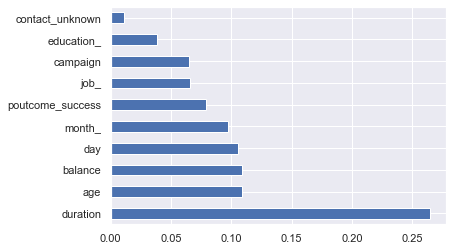

In [49]:
df_X = pd.DataFrame(data=X_train)
feat_importances = pd.Series(model.feature_importances_, index=X_.columns)
feat_importances.nlargest(10).plot(kind='barh')

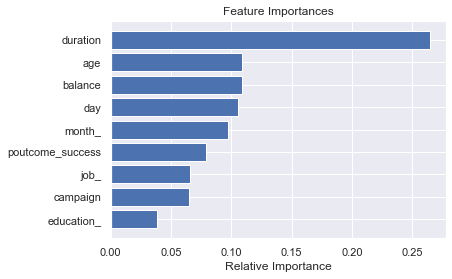

In [50]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# PCA

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.413142,0.678486
1,-0.197098,0.509653
2,-0.113286,-0.260604
3,1.218044,1.614203
4,0.912767,0.594877


In [52]:
pca.explained_variance_

array([2.48638086, 2.17997151])

In [62]:
pca.explained_variance_ratio_

array([0.13085802, 0.11473172])

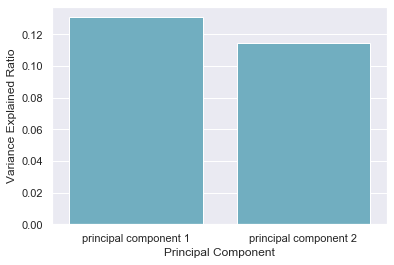

In [53]:
df = pd.DataFrame({'Variance Explained Ratio':pca.explained_variance_ratio_,
             'Principal Component':['principal component 1','principal component 2']})
sns.barplot(x='Principal Component',y="Variance Explained Ratio", 
           data=df, color="c");

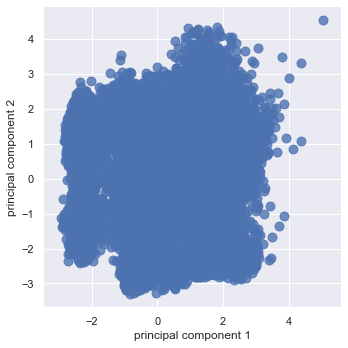

In [54]:
sns.lmplot( x="principal component 1", y="principal component 2",
  data=principalDf, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 80})

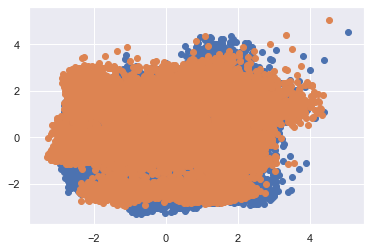

In [55]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'])
plt.scatter(principalDf['principal component 2'],principalDf['principal component 1'])

Explained Variance
The explained variance tells you how much information (variance) can be attributed to 
each of the principal components. This is important as while you can convert 
4 dimensional space to 2 dimensional space, you lose some of the variance (information) 
when you do this. By using the attribute explained_variance_ratio_,
you can see that the first principal component contains 72.77% of the variance and 
the second principal component contains 23.03% of the variance. 
Together, the two components contain 95.80% of the information

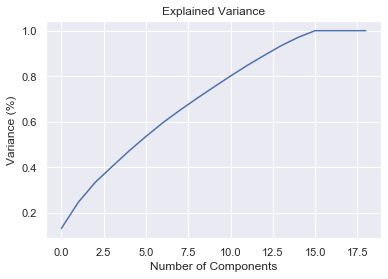

In [56]:
pca_1 = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:
This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

# ICA

In [57]:
#ICA
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X_trans=ICA.fit_transform(X)

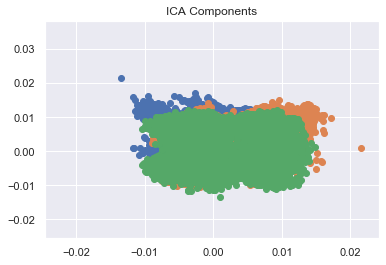

In [58]:
plt.title('ICA Components')
plt.scatter(X_trans[:,0], X_trans[:,1])
plt.scatter(X_trans[:,1], X_trans[:,2])
plt.scatter(X_trans[:,2], X_trans[:,0])

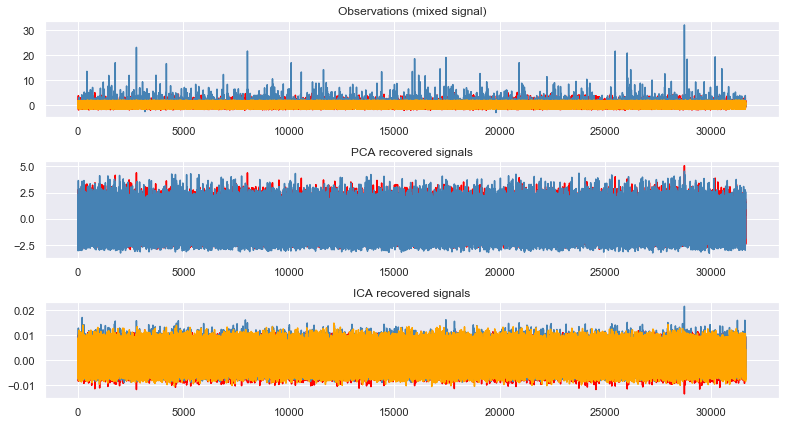

In [59]:
plt.figure(figsize=(12,8))
models = [X,principalComponents, X_trans]
names = ['Observations (mixed signal)',
         'PCA recovered signals',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

# Gaussian Randomised Projections

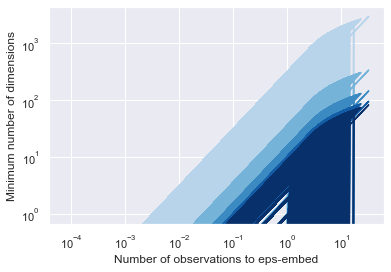

In [60]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
eps_range = np.linspace(0.1, 0.99, 5)
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(eps_range)))

plt.figure()
for eps, color in zip(eps_range, colors):
    min_n_components = johnson_lindenstrauss_min_dim(X, eps=eps)
    plt.xlabel('Number of observations to eps-embed')
    plt.ylabel('Minimum number of dimensions')
    plt.loglog(X, min_n_components, color=color)

# ...........................................TASK 3.....................................

# DIMENTIONALITY REDUCTION

In [6]:
#PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_fit = pca.fit_transform(X)
principalDf_fit = pd.DataFrame(data = principalComponents_fit)
principalDf_fit.head()


#ICA
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X_trans=ICA.fit_transform(principalDf_fit )


#RCA
from sklearn import random_projection
transformer=random_projection.GaussianRandomProjection(n_components=26)
X_new=transformer.fit_transform(principalDf_fit)
X_new.shape

(31647, 26)

In [88]:
X_new[:,1]

array([ 0.19155374,  0.10741759,  0.0094739 , ...,  0.00926567,
        0.20298589, -0.02050371])

Text(0.5, 1.0, 'KMeans')

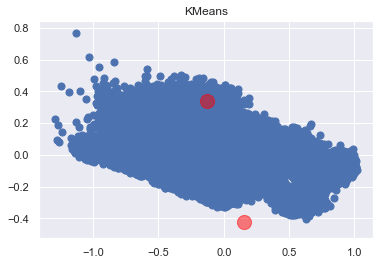

In [97]:
Kmeans_rp=KMeans(n_clusters=2)
Kmeans_rp.fit(X_new)
plt.scatter(X_new[:, 1], X_new[:, 2], s=50, cmap='visidis')
centers = Kmeans_rp.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

# KMEANS - PCA,ICA,RP

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sum_of_squared_distances_rp =[]
sum_of_squared_distances_ica=[]
sum_of_squared_distances_pca=[]
silhouette_score_avg_rp  =[]
silhouette_score_avg_ica =[]
silhouette_score_avg_pca =[]

K =range(2,7)
for k in K:
    Kmeans_rp=KMeans(n_clusters=k)
    Kmeans_rp.fit(X_new)
    sum_of_squared_distances_rp.append(Kmeans_rp.inertia_)
    cluster_labels_rp = Kmeans_rp.fit_predict(X_new)
    silhouette_avg_rp = silhouette_score(X_new, cluster_labels_rp)
    silhouette_score_avg_rp.append(silhouette_avg_rp)
    print("RP  - n_clusters =", k,"The average silhouette_score is :", silhouette_avg_rp)
    
    Kmeans_ica=KMeans(n_clusters=k)
    Kmeans_ica.fit(X_trans)
    sum_of_squared_distances_ica.append(Kmeans_ica.inertia_)
    cluster_labels_ica = Kmeans_ica.fit_predict(X_trans)
    silhouette_avg_ica = silhouette_score(X_trans, cluster_labels_ica)
    silhouette_score_avg_ica.append(silhouette_avg_ica)
    print("ICA - n_clusters =", k,"The average silhouette_score is :", silhouette_avg_ica)
    
    Kmeans_pca=KMeans(n_clusters=k)
    Kmeans_pca.fit(principalDf_fit)
    sum_of_squared_distances_pca.append(Kmeans_pca.inertia_)
    cluster_labels_pca = Kmeans_pca.fit_predict(principalDf_fit)
    silhouette_avg_pca = silhouette_score(principalDf_fit, cluster_labels_pca)
    silhouette_score_avg_pca.append(silhouette_avg_pca)
    print("PCA - n_clusters =", k,"The average silhouette_score is :", silhouette_avg_pca)
    


RP  - n_clusters = 2 The average silhouette_score is : 0.3568494362171937
ICA - n_clusters = 2 The average silhouette_score is : 0.3744622746637984
PCA - n_clusters = 2 The average silhouette_score is : 0.3888563768096669
RP  - n_clusters = 3 The average silhouette_score is : 0.43643180579305035
ICA - n_clusters = 3 The average silhouette_score is : 0.4359153243378923
PCA - n_clusters = 3 The average silhouette_score is : 0.429228762872454
RP  - n_clusters = 4 The average silhouette_score is : 0.4469782666672863
ICA - n_clusters = 4 The average silhouette_score is : 0.4434293769641651
PCA - n_clusters = 4 The average silhouette_score is : 0.4427343848322437
RP  - n_clusters = 5 The average silhouette_score is : 0.4851104100099536
ICA - n_clusters = 5 The average silhouette_score is : 0.48540272055645795
PCA - n_clusters = 5 The average silhouette_score is : 0.49289834354373163
RP  - n_clusters = 6 The average silhouette_score is : 0.5073892401351932
ICA - n_clusters = 6 The average sil

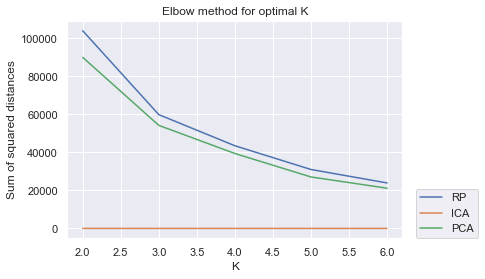

In [14]:

sns.set()
plt.plot(K,sum_of_squared_distances_rp,label="RP")
plt.plot(K,sum_of_squared_distances_ica,label="ICA")
plt.plot(K,sum_of_squared_distances_pca,label="PCA")
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.legend(loc=(1.04,0))
plt.show()

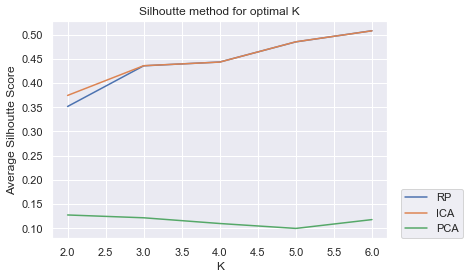

In [15]:

sns.set()
plt.plot(K,silhouette_score_avg_rp,label="RP")
plt.plot(K,silhouette_score_avg_ica,label="ICA")
plt.plot(K,silhouette_score_avg_pca,label="PCA")
plt.xlabel('K')
plt.ylabel('Average Silhoutte Score')
plt.title('Silhoutte method for optimal K')
plt.legend(loc=(1.04,0))
plt.show()

In [71]:
sum_of_squared_distances_pca=[]
silhouette_score_avg_pca =[]
K =range(2,7)
for k in K:
    
    Kmeans_pca=KMeans(n_clusters=k)
    Kmeans_pca.fit(principalDf_fit)
    sum_of_squared_distances_pca.append(Kmeans_pca.inertia_)
    cluster_labels_pca = Kmeans_pca.fit_predict(principalDf_fit)
    silhouette_avg_pca = silhouette_score(principalDf_fit, cluster_labels_pca)
    silhouette_score_avg_pca.append(silhouette_avg_pca)
    print("PCA - n_clusters =", k,"The average silhouette_score is :", silhouette_avg_pca)

PCA - n_clusters = 2 The average silhouette_score is : 0.3887998725551304
PCA - n_clusters = 3 The average silhouette_score is : 0.43008962124892613
PCA - n_clusters = 4 The average silhouette_score is : 0.44274002088364517
PCA - n_clusters = 5 The average silhouette_score is : 0.4928856360384623
PCA - n_clusters = 6 The average silhouette_score is : 0.5108296287819429


# EXPECTATION MAXIMIZATION : PCA,ICA,RP

Text(0.5, 0, 'n_components')

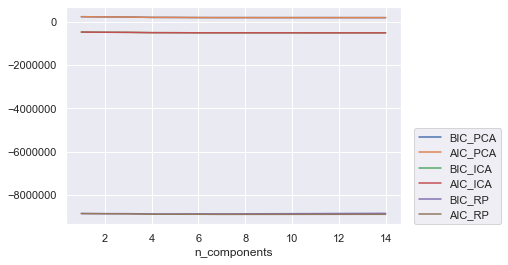

In [35]:
#EM
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 15)

models_pca = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalDf_fit)
          for n in n_components]
models_ica = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_trans)
          for n in n_components]
models_rca = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_new)
          for n in n_components]

plt.plot(n_components, [m.bic(principalDf_fit) for m in models_pca], label='BIC_PCA')
plt.plot(n_components, [m.aic(principalDf_fit) for m in models_pca], label='AIC_PCA')
plt.plot(n_components, [m.bic(X_trans) for m in models_ica], label='BIC_ICA')
plt.plot(n_components, [m.aic(X_trans) for m in models_ica], label='AIC_ICA')
plt.plot(n_components, [m.bic(X_new) for m in models_rca], label='BIC_RP')
plt.plot(n_components, [m.aic(X_new) for m in models_rca], label='AIC_RP')

plt.legend(loc=(1.04,0))
plt.xlabel('n_components')




# ...........................................TASK 4.....................................

# ANN

In [76]:
#PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents_fit = pca.fit_transform(X)
X_PCA = pd.DataFrame(data = principalComponents_fit)



#ICA
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=10, random_state=12) 
X_ICA=ICA.fit_transform(X )


#RCA
from sklearn import random_projection
transformer=random_projection.GaussianRandomProjection(n_components=10)
X_RP=transformer.fit_transform(X)


In [78]:
print(X_PCA.shape)
print(X_ICA.shape)
print(X_RP.shape)
print(y_train.shape)

(31647, 10)
(31647, 10)
(31647, 10)
(31647,)


In [79]:
X_PCA_train, X_PCA_test, y_PCA_Train, y_PCA_Test = train_test_split(X_PCA,y_train, test_size = 0.3, random_state = 0)
X_ICA_train, X_ICA_test, y_ICA_Train, y_ICA_Test = train_test_split(X_ICA,y_train, test_size = 0.3, random_state = 0)
X_RP_train, X_RP_test, y_RP_Train, y_RP_Test = train_test_split(X_RP,y_train, test_size = 0.3, random_state = 0)

Train on 22152 samples, validate on 9495 samples
Epoch 1/5
22152/22152 [==============================] - 2s 76us/step - loss: 0.3190 - accuracy: 0.8715 - val_loss: 0.2606 - val_accuracy: 0.8934
Epoch 2/5
22152/22152 [==============================] - 1s 57us/step - loss: 0.2580 - accuracy: 0.8952 - val_loss: 0.2546 - val_accuracy: 0.8934
Epoch 3/5
22152/22152 [==============================] - 1s 53us/step - loss: 0.2525 - accuracy: 0.8961 - val_loss: 0.2504 - val_accuracy: 0.8943
Epoch 4/5
22152/22152 [==============================] - 1s 57us/step - loss: 0.2494 - accuracy: 0.8974 - val_loss: 0.2479 - val_accuracy: 0.8951
Epoch 5/5
9495/9495 [==============================] - 0s 12us/step

accuracy: 89.90%

accuracy: 89.49%
Train on 22152 samples, validate on 9495 samples
Epoch 1/10
22152/22152 [==============================] - 1s 63us/step - loss: 0.3111 - accuracy: 0.8791 - val_loss: 0.2617 - val_accuracy: 0.8967
Epoch 2/10
22152/22152 [==============================] - 1s 54us/s

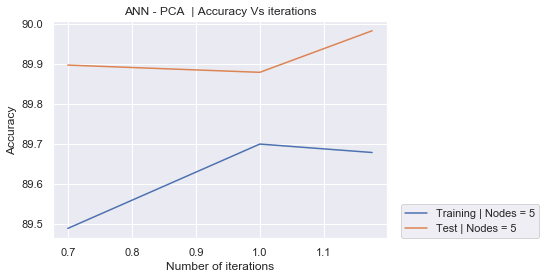

In [129]:
#X_PCA_train, X_PCA_test, y_PCA_Train, y_PCA_Test 
nodes = [5]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[5 , 10 , 15]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(10, input_dim=10, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(5, activation='tanh'))
        model.add(Dense(i, activation='tanh'))
        #model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(X_PCA_train,y_PCA_Train, epochs = j, batch_size=20, validation_data=(X_PCA_test, y_PCA_Test ))
        scores_test  = model.evaluate(X_PCA_train, y_PCA_Train)
        scores_train = model.evaluate(X_PCA_test,y_PCA_Test )
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title("ANN - PCA  | Accuracy Vs iterations")
    plt.legend(loc=(1.04,0))
    plt.show


Train on 22152 samples, validate on 9495 samples
Epoch 1/5
22152/22152 [==============================] - 2s 110us/step - loss: 0.3738 - accuracy: 0.8821 - val_loss: 0.3497 - val_accuracy: 0.8809
Epoch 2/5
22152/22152 [==============================] - 2s 108us/step - loss: 0.3009 - accuracy: 0.8875 - val_loss: 0.2672 - val_accuracy: 0.8922
Epoch 3/5
22152/22152 [==============================] - 2s 86us/step - loss: 0.2690 - accuracy: 0.8960 - val_loss: 0.2683 - val_accuracy: 0.8918
Epoch 4/5
22152/22152 [==============================] - 2s 89us/step - loss: 0.2671 - accuracy: 0.8962 - val_loss: 0.2670 - val_accuracy: 0.8928
Epoch 5/5
9495/9495 [==============================] - 0s 20us/step

accuracy: 89.50%

accuracy: 89.35%
Train on 22152 samples, validate on 9495 samples
Epoch 1/10
22152/22152 [==============================] - 3s 127us/step - loss: 0.3746 - accuracy: 0.8823 - val_loss: 0.3528 - val_accuracy: 0.8809
Epoch 2/10
22152/22152 [==============================] - 2s 82u

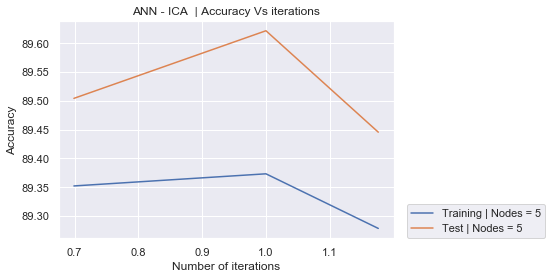

In [82]:
#X_ICA_train, X_ICA_test, y_ICA_Train, y_ICA_Test
nodes = [5]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[5 , 10 , 15]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(10, input_dim=10, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(5, activation='tanh'))
        model.add(Dense(i, activation='tanh'))
        #model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(X_ICA_train,y_ICA_Train, epochs = j, batch_size=20, validation_data=(X_ICA_test, y_ICA_Test ))
        scores_test  = model.evaluate(X_ICA_train, y_ICA_Train)
        scores_train = model.evaluate(X_ICA_test,y_ICA_Test )
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('ANN - ICA  | Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


Train on 22152 samples, validate on 9495 samples
Epoch 1/5
22152/22152 [==============================] - 2s 70us/step - loss: 0.3365 - accuracy: 0.8714 - val_loss: 0.2847 - val_accuracy: 0.8910
Epoch 2/5
22152/22152 [==============================] - 1s 62us/step - loss: 0.2774 - accuracy: 0.8932 - val_loss: 0.2736 - val_accuracy: 0.8906
Epoch 3/5
22152/22152 [==============================] - 1s 62us/step - loss: 0.2696 - accuracy: 0.8942 - val_loss: 0.2670 - val_accuracy: 0.8934
Epoch 4/5
22152/22152 [==============================] - 1s 62us/step - loss: 0.2659 - accuracy: 0.8941 - val_loss: 0.2633 - val_accuracy: 0.8927
Epoch 5/5
9495/9495 [==============================] - 0s 14us/step

accuracy: 89.64%

accuracy: 89.36%
Train on 22152 samples, validate on 9495 samples
Epoch 1/10
22152/22152 [==============================] - 1s 66us/step - loss: 0.3294 - accuracy: 0.8693 - val_loss: 0.2825 - val_accuracy: 0.8877
Epoch 2/10
22152/22152 [==============================] - 1s 65us/s

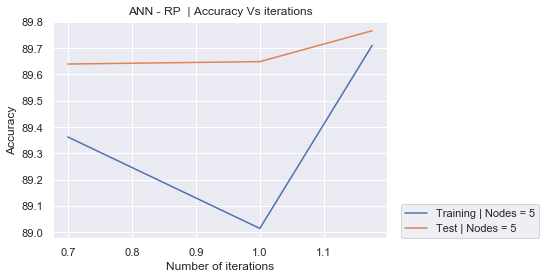

In [83]:
#X_RP_train, X_RP_test, y_RP_Train, y_RP_Test
#X_ICA_train, X_ICA_test, y_ICA_Train, y_ICA_Test
nodes = [5]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[5 , 10 , 15]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(10, input_dim=10, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(5, activation='tanh'))
        model.add(Dense(i, activation='tanh'))
        #model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(X_RP_train,y_RP_Train, epochs = j, batch_size=20, validation_data=(X_RP_test, y_RP_Test ))
        scores_test  = model.evaluate(X_RP_train, y_RP_Train)
        scores_train = model.evaluate(X_RP_test,y_RP_Test )
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('ANN - RP  | Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


In [ ]:
ANN - PCA : 90.07,  89.74
ANN - ICA : 89.45,  89.28
ANN - RP  : 89.71,  89.77

# .....................................TASK 5...............................

In [111]:
#Taking cluster labels from task1 and using as input features
X_=data.iloc[:,0:-2]
y_ = data.iloc[:,0:-1]
X_Scaled = preprocessing.scale(X_)
Kmeans=KMeans(n_clusters=2)
Kmeans.fit(X_Scaled)
cluster_labels = Kmeans.fit_predict(X_Scaled)

In [121]:
X_=data.iloc[:,0:-2]
y_ = data.iloc[:,-1]

In [107]:
X_.shape

(45211, 18)

In [122]:
y_.shape

(45211,)

In [113]:
cluster_labels.shape

(45211,)

In [126]:
xTrain, xTest, yTrain, yTest = train_test_split(cluster_labels,y_, test_size = 0.3, random_state = 0)

In [127]:
print(xTrain.shape)
print(yTrain.shape)

(31647,)
(31647,)


Train on 31647 samples, validate on 13564 samples
Epoch 1/5
31647/31647 [==============================] - 3s 107us/step - loss: 0.3640 - accuracy: 0.8833 - val_loss: 0.3532 - val_accuracy: 0.8824
Epoch 2/5
31647/31647 [==============================] - 2s 75us/step - loss: 0.3510 - accuracy: 0.8833 - val_loss: 0.3530 - val_accuracy: 0.8824
Epoch 3/5
31647/31647 [==============================] - 2s 77us/step - loss: 0.3510 - accuracy: 0.8833 - val_loss: 0.3536 - val_accuracy: 0.8824
Epoch 4/5
31647/31647 [==============================] - 2s 79us/step - loss: 0.3507 - accuracy: 0.8833 - val_loss: 0.3538 - val_accuracy: 0.8824
Epoch 5/5
13564/13564 [==============================] - 0s 20us/step

accuracy: 88.33%

accuracy: 88.24%
Train on 31647 samples, validate on 13564 samples
Epoch 1/10
31647/31647 [==============================] - 3s 83us/step - loss: 0.3616 - accuracy: 0.8833 - val_loss: 0.3533 - val_accuracy: 0.8824
Epoch 2/10
31647/31647 [==============================] - 2s 7

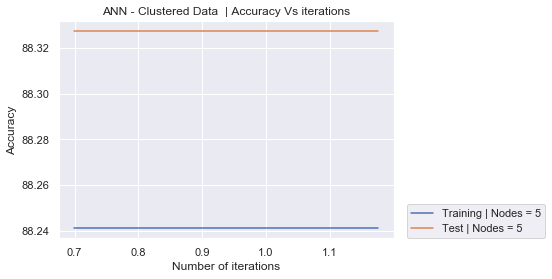

In [128]:
#xTrain, xTest, yTrain, yTest
nodes = [5]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[5 , 10 , 15]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(10, input_dim=1, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(5, activation='tanh'))
        model.add(Dense(i, activation='tanh'))
        #model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(xTrain,yTrain, epochs = j, batch_size=20, validation_data=(xTest, yTest ))
        scores_test  = model.evaluate(xTrain, yTrain)
        scores_train = model.evaluate(xTest,yTest )
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('ANN - Clustered Data  | Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show
